In [44]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [47]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    number3 : int
    number4 : int
    operator1 : str
    operator2 : str
    finalNumber1 : int
    finalNumber2 : int

In [46]:
def adder1(state: AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor1(state: AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def decide_next_node1(state: AgentState) -> str:
    if state["operator1"] == "+":
        return "addition1"
    elif state["operator1"] == "-":
        return "subtraction1"

In [48]:
def adder2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node2(state: AgentState) -> str:
    if state["operator2"] == "+":
        return "addition2"
    elif state["operator2"] == "-":
        return "subtraction2"

In [53]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("router1", lambda state:state)

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        "addition1": "add_node1",
        "subtraction1": "subtract_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition2": "add_node2",
        "subtraction2": "subtract_node2"
    }
)

graph.add_edge("router2", END)
graph.add_edge("router2", END)


app = graph.compile()

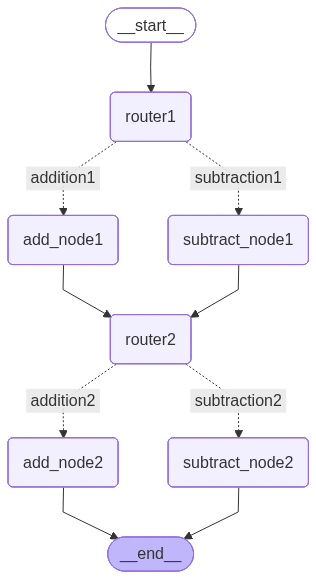

In [54]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [55]:
initial_state = AgentState(
    number1 = 10,
    number2 = 5,
    number3 = 7,
    number4 = 2,
    operator1 = "-",
    operator2 = "+",
    finalNumber1 = 0,
    finalNumber2 = 0
)

app.invoke(initial_state)

{'number1': 10,
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operator1': '-',
 'operator2': '+',
 'finalNumber1': 5,
 'finalNumber2': 9}